# Calculate CM of the body for a front flip

## Josh Berg and Aaron Titus, High Point University


## Description

The purpose of this program is to read data for position (x,y) and time (t) for forearm (with hand), upper arm, trunk, thigh, lower leg, and head. It assumes the arms and legs are parallel. It uses Dempster's body segment parameters.

Units are meters.

Segmental mass as ratio of total mass.

| head | trunk | upper arm | forearm and hand | thigh | lower leg |
| --- | --- | --- | --- | --- | --- |
| .0810 | .497 | .028 | .022 | .1 | .0465 |

**Need to include reference to biomechanics book here.**

## Using pandas to read data from a text file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #used for graphing

In [2]:
#show graphs inline (do not use for print publication quality graphs)
%matplotlib inline

In [3]:
# Read data file and define dataframe object (df for dataframe)
df_all = pd.read_table('front-flip/data-trial1.txt')

In [4]:
#print first five rows of data with the header
df_all.head()

,t,x_head,y_head,x_trunk,y_trunk,x_upper_arm,y_upper_arm,x_forearm,y_forearm,x_thigh,y_thigh,x_leg,y_leg
0,0.0000,0.277,2.65,0.0926,2.12,0.238,2.17,0.616,1.86,-0.007340,1.24,0.000158,0.498
1,0.0167,0.325,2.72,0.1320,2.15,0.327,2.22,0.726,1.98,-0.000434,1.26,-0.016800,0.491
2,0.0333,0.349,2.75,0.1550,2.26,0.361,2.33,0.717,2.09,0.011600,1.30,-0.006580,0.525
3,0.0500,0.384,2.80,0.2100,2.28,0.425,2.38,0.757,2.18,-0.042400,1.37,-0.038400,0.596
4,0.0667,0.420,2.88,0.1890,2.32,0.394,2.45,0.782,2.25,-0.031300,1.41,-0.031600,0.641


In [5]:
Mlbs = 165 #total weight in pounds
M = Mlbs/2.2 #total mass in kg
segmass_percent=np.array([.0810 , .497 , 2*.028 , 2*.022 , 2*.1 , 2*.0465])
segmass=segmass_percent*M
#print(M,np.sum(segmass),segmass)

In [6]:
# Column heading full names
data_labels= [
    't (s)',
    'x of head (px)',
    'y of head (px)',
    'x of trunk (px)',
    'y of trunk (px)',
    'x of upper arm (px)',
    'y of upper arm (px)',
    'x of forearm+hand (px)',
    'y of forearm+hand (px)',
    'x of thigh (px)',
    'y of thigh (px)',
    'x of lower leg (px)',
    'y of lower leg (px)',
]


In [7]:
#rows, columns of data table
df_all.shape

(84, 13)

In [8]:
#create a V array for all rows
tarray = np.array(df_all['t'].tolist()) #create array
tarray.shape


(84,)

In [9]:
#create a x array for all rows
x_headarray = np.array(df_all['x_head'].tolist()) #create array
x_headarray.shape
y_headarray = np.array(df_all['y_head'].tolist()) #create array
y_headarray.shape


x_trunk = np.array(df_all['x_trunk'].tolist()) #create array
x_trunk.shape
y_trunk = np.array(df_all['y_trunk'].tolist()) #create array
y_trunk.shape

x_upper_arm = np.array(df_all['x_upper_arm'].tolist()) #create array
x_upper_arm.shape
y_upper_arm = np.array(df_all['y_upper_arm'].tolist()) #create array
y_upper_arm.shape

x_forearm = np.array(df_all['x_forearm'].tolist()) #create array
x_forearm.shape
y_forearm = np.array(df_all['y_forearm'].tolist()) #create array
y_forearm.shape

x_thigh = np.array(df_all['x_thigh'].tolist()) #create array
x_thigh.shape
y_thigh = np.array(df_all['y_thigh'].tolist()) #create array
y_thigh.shape

x_leg = np.array(df_all['x_leg'].tolist()) #create array
x_leg.shape
y_leg = np.array(df_all['y_leg'].tolist()) #create array
y_leg.shape

(84,)

In [10]:
# compute CM
#segmentdata=[[x_headarray,y_headarray],[x_trunk,y_trunk],[x_upper_arm,y_upper_arm],[x_forearm,y_forearm],[x_thigh,y_thigh],[x_leg,y_leg]]
xcmarray=segmass[0]*x_headarray+segmass[1]*x_trunk+ segmass[2]*x_upper_arm+ segmass[3]*x_forearm+segmass[4]*x_thigh+segmass[5]*x_leg
ycmarray=segmass[0]*y_headarray+segmass[1]*y_trunk+ segmass[2]*y_upper_arm+ segmass[3]*y_forearm+segmass[4]*y_thigh+segmass[5]*y_leg

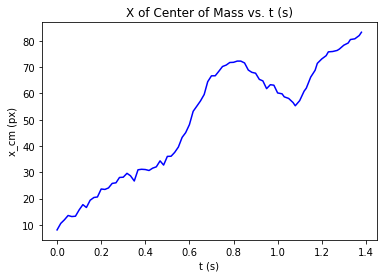

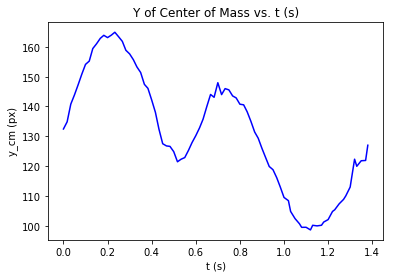

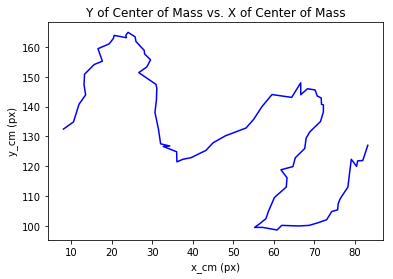

In [11]:
#plot graph
fig2 = plt.figure()
plt.title('X of Center of Mass vs. ' + data_labels[0])
plt.xlabel(data_labels[0])
plt.ylabel("x_cm (px)")
plt.plot(tarray,xcmarray,'b-')
plt.show()

fig2 = plt.figure()
plt.title('Y of Center of Mass vs. ' + data_labels[0])
plt.xlabel(data_labels[0])
plt.ylabel("y_cm (px)")
plt.plot(tarray,ycmarray,'b-')
plt.show()

fig2 = plt.figure()
plt.title('Y of Center of Mass vs. X of Center of Mass')
plt.xlabel("x_cm (px)")
plt.ylabel("y_cm (px)")
plt.plot(xcmarray,ycmarray,'b-')
plt.show()